In [1]:
import ROOT
import os

Welcome to JupyROOT 6.26/00


In [2]:
remotefolder="https://github.com/oiorio/AnalisiDati/raw/main/7.%20Stime%20dai%20dati/"
datamuname="DataSingleMu_Full.root"
datasetpath=remotefolder+datamuname
print (datasetpath)
if not os.path.exists(datamuname):
    os.system("wget "+datasetpath)


https://github.com/oiorio/AnalisiDati/raw/main/7.%20Stime%20dai%20dati/DataSingleMu_Full.root


In [3]:
myf = ROOT.TFile(datamuname)
myt=myf.gettriggerinfo.events

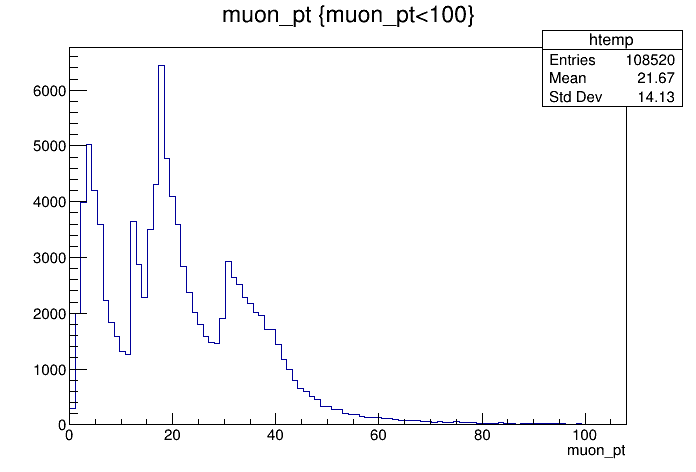

In [4]:
c= ROOT.TCanvas("c")
myt.Draw("muon_pt","muon_pt<100")
c.Draw()


In [5]:
def getPlot(evts=myt,var="muon_pt",trigger="passes_trigger",cut="",hbins=(20,0,100),name=""):
    d=ROOT.TH1D("d","d",hbins[0],hbins[1],hbins[2])
    n=ROOT.TH1D("n","n",hbins[0],hbins[1],hbins[2])
    t=ROOT.TH1D("t"+name,"",hbins[0],hbins[1],hbins[2])
    evts.Project(d.GetName(),var,cut)
    if(cut!=""):cut="&& "+cut
    evts.Project(n.GetName(),var,trigger+" "+cut)
    t.Add(n)
    t.Divide(d)
    
    return t

 FCN=0.898585 FROM MIGRAD    STATUS=CONVERGED     401 CALLS         402 TOTAL
                     EDM=3.00686e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.62164e-01   1.93586e-01   1.29254e-04   2.10385e-03
   2  p1           2.37163e+00   8.41430e+01   4.55497e-03  -2.40295e-04
   3  p2           2.30061e+01   1.79705e+01   1.07478e-03  -1.02390e-03
 FCN=0.70792 FROM MIGRAD    STATUS=CONVERGED      84 CALLS          85 TOTAL
                     EDM=2.81679e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.61056e-01   2.53120e-01   1.60414e-04  -5.23880e-04
   2  p1           2.35399e+00   2.05941e+02   3.04398e-03   1.85409e-05
   3  p2           2.30890e+01  

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


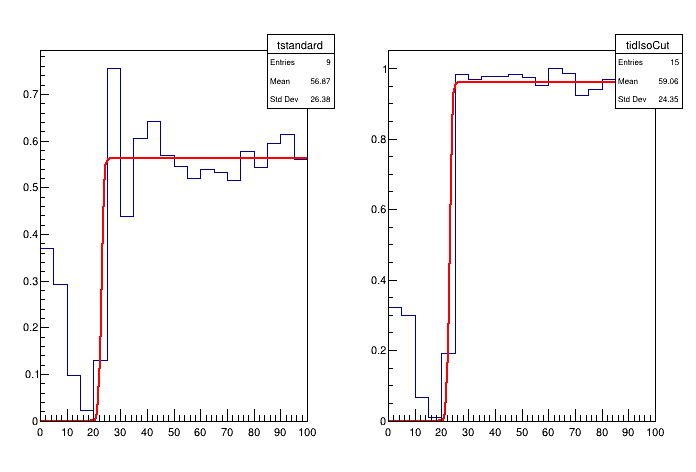

In [6]:
c=ROOT.TCanvas("c","c")
c.Divide(2,1)
p = getPlot(name="standard")
c.cd(1)
sigmoid = ROOT.TF1("sigmoid", "([0]/(1+ TMath::Exp(-[1]*(x-[2]))))", 0, 100)
p.Fit(sigmoid)
p.Draw()
c.cd(2)
p2 = getPlot(cut="muon_id && muon_iso<0.1",name="idIsoCut")
p2.Fit(sigmoid)
p2.Draw()
c.Draw()

In [7]:
filenamemet="DataMET_Full.root"
datasetpath=remotefolder+filenamemet
if not os.path.exists(filenamemet):
    os.system("wget "+datasetpath)

In [8]:
DataMET=ROOT.TFile(filenamemet)

In [9]:
metevts=evts=DataMET.gettriggerinfo.events

 FCN=0.0411962 FROM HESSE     STATUS=NOT POSDEF     16 CALLS          72 TOTAL
                     EDM=1.23925e-06    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.35858e-01   2.49425e-01   2.46772e-05  -5.71279e-05
   2  p1           2.03643e+00   8.42523e+01   5.35601e-04   1.60923e-05
   3  p2           2.30099e+01   2.10876e+01   1.34021e-04  -1.03726e-05


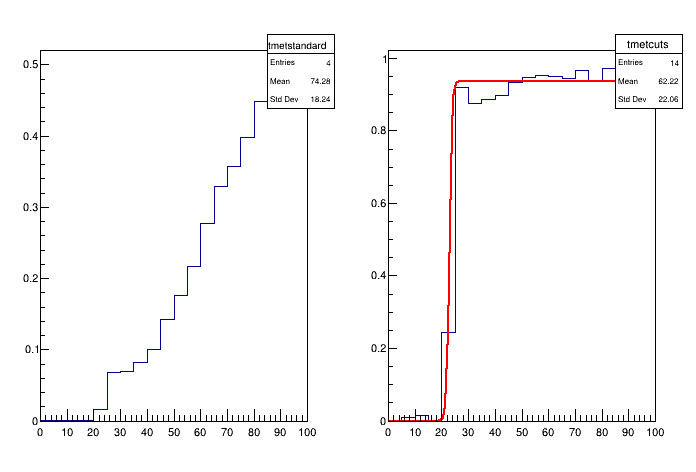

In [10]:
pmet=getPlot(evts=metevts,name="metstandard")
c.cd(1)
pmet.Draw()
pmetcuts=getPlot(evts=metevts,cut="muon_id&& muon_iso<0.1",name="metcuts")
c.cd(2)
pmetcuts.Fit(sigmoid)
pmetcuts.Draw()
c.Draw()

In [11]:
import pandas

In [12]:
dfsinglemu = pandas.DataFrame(ROOT.RDataFrame(myt).AsNumpy())
dfsinglemu.to_csv("DataSingleMu.csv")

In [13]:
dfmet = pandas.DataFrame(ROOT.RDataFrame(metevts).AsNumpy())
dfmet.to_csv("DataMET.csv")